 # <b> Predict Breast Cancer<b>


## 1. Importing Packages

In [16]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.style.use('ggplot')
%matplotlib inline

In [17]:
#Viewing dataset
df = pd.read_csv('data/cancer.data', header=None)

## 2. Exploratory Data Analysis

In [18]:
#Overview of the dataset
df.info

# converting the "?" values to NaN
df = df.replace('?', np.nan)


# filling in NaNs with the most frequent value from its column
for col in df:
    if df[col].dtype == 'object':
        df = df.fillna(df[col].value_counts().index[0])
        
#dropping duplicates within the dataframe
df = df.drop_duplicates()

In [19]:
#Renaming columns
column_names = {0:'id number', 1:"Clump Thickness", 2:"Uniformity of Cell Size", 3:"Uniformity of Cell Shape", 4: "Marginal Adhesion", 5:"Single Epithelial Cell Size",
              6:"Bare Nuclei", 7:"Bland Chromatin", 8:"Normal Nucleoli", 9:"Mitosesi", 10:"Class"}
df = df.rename(columns=column_names)

# converting the non integer values to integers
df["Bare Nuclei"] = df["Bare Nuclei"].replace("?", 0) 
df["Bare Nuclei"] = df["Bare Nuclei"].astype("int64")

In [20]:
# Droping the ID and Class columns and convert the DataFrame to a NumPy array
df = df.drop(columns = df.columns[0], axis=1)

#Inspecting the object values
df['Bare Nuclei'].value_counts()

# Converting Class entries to binary
df['Class'] = df['Class'].replace([2,4], [1,0])

In [21]:
#Creating dummy variables

l_e =  LabelEncoder()
for col in df:
      if df[col].dtypes =='object':
        df[col]=l_e.fit_transform(df[col])

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitosesi                       int64
Class                          int64
dtype: object

## 3. Feature selection

<b>Hypothesis Testing</b>

Null hypthesis (H0) : The feature variables do not have a significant effect on the response variable 

Alternative Hypothesis (H1) : The at least one of the feature variables have a significant effect on the response variable 

In [22]:
# data descriptives
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosesi,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,0.655072
std,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.475689
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


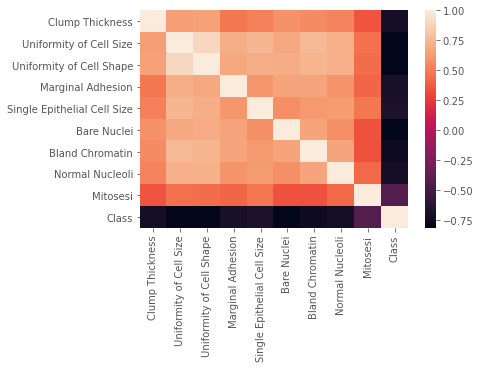

In [23]:
# Feature selection for model
sns.heatmap(df.corr())

In [24]:
df.corr()['Class']

Clump Thickness               -0.716812
Uniformity of Cell Size       -0.817586
Uniformity of Cell Shape      -0.817551
Marginal Adhesion             -0.701175
Single Epithelial Cell Size   -0.681063
Bare Nuclei                   -0.816655
Bland Chromatin               -0.756736
Normal Nucleoli               -0.715363
Mitosesi                      -0.423947
Class                          1.000000
Name: Class, dtype: float64

In [25]:
# segregate features and lables into separate variables
X= df.drop(['Class'], axis=1)
y=df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [26]:
# Transforming the Features
X,y = df.drop('Class', axis = 1) , df['Class']

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [27]:
# Building a model

model = LogisticRegression()

#fitting the log regression to train set
model.fit(rescaledX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Confussion matrix
predict_model = model.predict(rescaledX_test)
pred_model = model.predict(rescaledX_train)
labels = ['Benign', ' Malignant']

#Confusion matrix for test data
pd.DataFrame(data=confusion_matrix(y_test, predict_model), index=labels, columns=labels)

,Benign,Malignant
Benign,57,6
Malignant,2,142


In [29]:
#Confusion matrix for training data
pd.DataFrame(data=confusion_matrix(y_train, pred_model), index=labels, columns=labels)

,Benign,Malignant
Benign,168,7
Malignant,8,300


In [43]:
#Adding constant column 
X1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X1).fit()
model.pvalues
model.score

AttributeError: 'OLSResults' object has no attribute 'score'

## 4. Classification report

In [35]:
#Classification report

print(classification_report(y_test, predict_model))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.96      0.99      0.97       144

    accuracy                           0.96       207
   macro avg       0.96      0.95      0.95       207
weighted avg       0.96      0.96      0.96       207



In [42]:
# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier on test: ", model.score(rescaledX_test, y_test))

print("Accuracy of logistic regression classifier on train: ", model.score(rescaledX_train, y_train))

AttributeError: 'OLSResults' object has no attribute 'score'

# 5. Receiver Operating Characteristic (ROC)

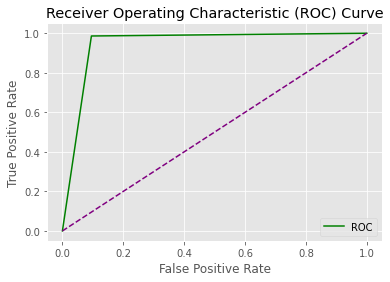

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

logreg_roc_auc = roc_auc_score(y_test, predict_model)
fpr, tpr, threshold_log = roc_curve(y_test, predict_model)

plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()